In [1]:
INPUT_DIR = '/kaggle/input/anime-recommendation-database-2020'
!ls {INPUT_DIR}

 anime.csv		   animelist.csv   rating_complete.csv
 anime_with_synopsis.csv  'html folder'    watching_status.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
rating_df = pd.read_csv(INPUT_DIR + '/rating_complete.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7


In [4]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

24573682

In [5]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.6908262714196066


In [6]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 0 duplicates


In [7]:
#identify the top users and top animes based on the number of ratings
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc="sum")

anime_id,1535,1575,2904,4224,5081,5114,6547,8074,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276,30831,31964
user_id,,,,,,,,,,,,,,,,,,,,
10255,0.777778,0.777778,0.888889,0.777778,0.555556,1.000000,0.666667,0.222222,1.000000,0.888889,0.555556,NaN,0.666667,0.777778,0.444444,0.555556,NaN,0.333333,0.444444,0.444444
64807,0.666667,1.000000,1.000000,0.666667,1.000000,0.888889,0.666667,0.888889,0.444444,1.000000,0.444444,0.000000,0.555556,0.777778,0.777778,0.777778,0.222222,0.888889,NaN,0.777778
68042,1.000000,0.888889,0.777778,0.888889,1.000000,0.888889,0.666667,0.222222,0.888889,0.777778,0.333333,0.333333,0.555556,0.888889,0.222222,0.111111,0.444444,0.888889,0.444444,0.777778
85106,0.888889,0.888889,1.000000,0.888889,0.888889,1.000000,0.777778,0.555556,1.000000,1.000000,0.666667,0.555556,0.777778,1.000000,0.888889,0.666667,0.333333,1.000000,0.777778,0.777778
122341,0.222222,0.111111,0.111111,0.222222,0.222222,0.777778,0.444444,0.000000,0.666667,0.222222,0.111111,0.000000,0.222222,0.000000,0.333333,0.333333,0.111111,0.555556,0.222222,0.222222
162615,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
182280,0.888889,0.777778,0.555556,NaN,0.777778,1.000000,0.666667,0.666667,1.000000,0.888889,NaN,NaN,0.777778,NaN,NaN,NaN,NaN,NaN,0.666667,0.555556
189037,0.888889,0.666667,0.666667,0.888889,0.666667,0.777778,1.000000,0.666667,1.000000,0.777778,0.777778,0.666667,0.888889,0.555556,0.666667,0.666667,0.666667,0.777778,0.777778,0.666667
190748,0.555556,0.222222,0.222222,0.333333,0.444444,0.777778,0.666667,0.222222,0.555556,0.444444,0.333333,0.000000,0.555556,0.555556,0.222222,0.111111,NaN,0.222222,0.444444,NaN


Data Preprocessing

In [8]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 35292, Num of animes: 16844
Min rating: 0.0, Max rating: 1.0


In [9]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values #feature matrix, where each row represents a user-anime pair
y = rating_df["rating"]

In [10]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 24563682
> Test set ratings: 10000


In [11]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [12]:
# Accelerator check
import tensorflow as tf

TPU_INIT = True

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    !nvidia-smi
    
print(tf.__version__)

D1018 10:21:20.885996525      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D1018 10:21:20.886023992      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D1018 10:21:20.886027905      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D1018 10:21:20.886030977      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D1018 10:21:20.886033659      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D1018 10:21:20.886036736      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D1018 10:21:20.886039463      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D1018 10:21:20.

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


2.12.0


## **Collaborative Filtering**

Model Building

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten
from tensorflow.keras import regularizers

def RecommenderNet():
    embedding_size = 128
    
    # Inputs
    user = Input(name='user', shape=[1])
    anime = Input(name='anime', shape=[1])
    
    # Embeddings with Dropout
    user_embedding = Embedding(name='user_embedding', input_dim=n_users, output_dim=embedding_size)(user)
    user_embedding = Dropout(0.2)(user_embedding)
    
    anime_embedding = Embedding(name='anime_embedding', input_dim=n_animes, output_dim=embedding_size)(anime)
    anime_embedding = Dropout(0.2)(anime_embedding)
    
    # Dot product and flatten
    x = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    x = Flatten()(x)
    
    # Dense and output
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    # Optimizer with learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0001, decay_steps=1000, decay_rate=0.9)
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer=Adam(learning_rate=lr_schedule))
    
    return model
# Initialize model using TPU scope if TPU is available
if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       4517376     ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2156032     ['anime[0][0]']                  
                                                                                              

In [15]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, EarlyStopping

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

# Checkpoint to save best model
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

# Final callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [16]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

# Load best weights after training
model.load_weights(checkpoint_filepath)

Epoch 1/20


2024-10-18 10:21:41.882775: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-10-18 10:21:42.036735: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


308/308 [==============================] - ETA: 0s - loss: 0.7890 - mae: 0.2730 - mse: 0.1112

2024-10-18 10:21:56.565706: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-10-18 10:21:56.687457: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


308/308 [==============================] - 18s 30ms/step - loss: 0.7890 - mae: 0.2730 - mse: 0.1112 - val_loss: 0.7031 - val_mae: 0.2334 - val_mse: 0.0770 - lr: 9.6817e-05
Epoch 2/20
308/308 [==============================] - 4s 14ms/step - loss: 0.7716 - mae: 0.2641 - mse: 0.1044 - val_loss: 0.7444 - val_mae: 0.2498 - val_mse: 0.0931 - lr: 9.3726e-05
Epoch 3/20
308/308 [==============================] - 4s 13ms/step - loss: 0.7452 - mae: 0.2496 - mse: 0.0935 - val_loss: 0.7151 - val_mae: 0.2280 - val_mse: 0.0792 - lr: 9.0733e-05
Epoch 4/20
308/308 [==============================] - 4s 13ms/step - loss: 0.7046 - mae: 0.2252 - mse: 0.0762 - val_loss: 0.6734 - val_mae: 0.1980 - val_mse: 0.0611 - lr: 8.7836e-05
Epoch 5/20
308/308 [==============================] - 4s 13ms/step - loss: 0.6733 - mae: 0.2048 - mse: 0.0627 - val_loss: 0.6511 - val_mae: 0.1817 - val_mse: 0.0513 - lr: 8.5031e-05
Epoch 6/20
308/308 [==============================] - 4s 14ms/step - loss: 0.6549 - mae: 0.1919 - ms

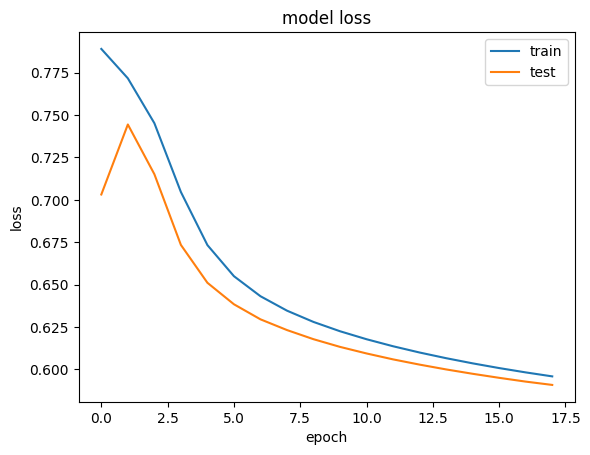

In [17]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

Extracting weights from model

In [18]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [19]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573682 entries, 42143912 to 20924745
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
 3   user      int64  
 4   anime     int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 GB


In [20]:
rating_df.head()

,user_id,anime_id,rating,user,anime
42143912,258873,31845,1.000000,25719,3063
14440173,88499,35413,0.888889,8817,3522
14693825,90083,12467,0.666667,8973,764
34955732,214543,479,0.777778,21251,4326
45893759,281560,11103,0.555556,28034,4276


In [21]:
rating_df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,user_id,anime_id,rating,user,anime
count,24573682,24573682,24573682,24573682,24573682
mean,177510,16587,1,17652,2356
std,102314,13304,0,10198,2438
min,17,1,0,0,0
25%,88147,4015,1,8784,584
50%,178489,13357,1,17668,1741
75%,266836,30383,1,26501,3372
max,353398,48456,1,35291,16843


anime meta data

In [22]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [23]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [24]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

sypnopsis data

In [25]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

In [26]:
sypnopsis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Genres     16214 non-null  object
 3   sypnopsis  16206 non-null  object
dtypes: int64(1), object(3)
memory usage: 506.8+ KB


**Finding Similar Animes (Item Based Recommendation)**

In [27]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [28]:
find_similar_animes('Dragon Ball', n=10, neg=False)

animes closest to Dragon Ball


,name,similarity,genre,sypnopsis
9,Dragon Ball Z,0.864198,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after winning the World Martial Arts tournament, Gokuu is now living a peaceful life with his wife and son. This changes, however, with the arrival of a mysterious enemy named Raditz who presents himself as Gokuu's long-lost brother. He reveals that Gokuu is a warrior from the once powerful but now virtually extinct Saiyan race, whose homeworld was completely annihilated. When he was sent to Earth as a baby, Gokuu's sole purpose was to conquer and destroy the planet; but after suffering amnesia from a head injury, his violent and savage nature changed, and instead was raised as a kind and well-mannered boy, now fighting to protect others. With his failed attempt at forcibly recruiting Gokuu as an ally, Raditz warns Gokuu's friends of a new threat that's rapidly approaching Earth—one that could plunge Earth into an intergalactic conflict and cause the heavens themselves to shake. A war will be fought over the seven mystical dragon balls, and only the strongest will survive in Dragon Ball Z ."
8,Rurouni Kenshin,0.801204,"Action, Adventure, Comedy, Historical, Romance, Samurai, Shounen","In the final years of the Bakumatsu era lived a legendary assassin known as Hitokiri Battousai. Feared as a merciless killer, he was unmatched throughout the country, but mysteriously disappeared at the peak of the Japanese Revolution. It has been ten peaceful years since then, but the very mention of Battousai still strikes terror into the hearts of war veterans. Unbeknownst to them, Battousai has abandoned his bloodstained lifestyle in an effort to repent for his sins, now living as Kenshin Himura, a wandering swordsman with a cheerful attitude and a strong will. Vowing never to kill again, Kenshin dedicates himself to protecting the weak. One day, he stumbles across Kaoru Kamiya at her kendo dojo, which is being threatened by an impostor claiming to be Battousai. After receiving help from Kenshin, Kaoru allows him to stay at the dojo, and so the former assassin temporarily ceases his travels. Rurouni Kenshin: Meiji Kenkaku Romantan tells the story of Kenshin as he strives to save those in need of saving. However, as enemies from both past and present begin to emerge, will the reformed killer be able to uphold his new ideals?"
7,Yu Yu Hakusho:Ghost Files,0.775801,"Action, Comedy, Demons, Supernatural, Martial Arts, Shounen","One fateful day, Yuusuke Urameshi, a 14-year-old delinquent with a dim future, gets a miraculous chance to turn it all around when he throws himself in front of a moving car to save a young boy. His ultimate sacrifice is so out of character that the authorities of the spirit realm are not yet prepared to let him pass on. Koenma, heir to the throne of the spirit realm, offers Yuusuke an opportunity to regain his life through completion of a series of tasks. With the guidance of the death god Botan, he is to thwart evil presences on Earth as a Spirit Detective. To help him on his venture, Yuusuke enlists ex-rival Kazuma Kuwabara, and two demons, Hiei and Kurama, who have criminal pasts. Together, they train and battle against enemies who would threaten humanity's very existence."
6,Hunter x Hunter,0.755515,"Action, Adventure, Super Power, Fantasy, Shounen","Hunters are specialized in a wide variety of fields, ranging from treasure hunting to cooking. They have access to otherwise unavailable funds and information that allow them to pursue their dreams and interests. However, being a hunter is a special privilege, only attained by taking a deadly exam with an extremely low success rate. Gon Freecss, a 12-year-old boy with the hope of finding his missing father, sets out on a quest to take the Hunter Exam. Along the way, he picks up three companions who also aim to take the dangerous test: the revenge-seeking Kurapika, aspiring doctor Leorio Paladiknight, and a mischievous child the same

In [29]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,A Silent Voice,0.993824,"Drama, School, Shounen","s a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye. Now in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends. Koe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
3,Your Lie in April,0.987884,"Drama, Music, Romance, School, Shounen","usic accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. Two years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. Based on the manga series of the same name, Shigatsu wa Kimi no Uso approaches the story of Kousei's recovery as he discovers that music is more than playing each note perfectly, and a single melody can bring in the fresh spring air of April."
2,Code Geass:Lelouch of the Rebellion R2,0.986881,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
1,Code Geass:Lelouch of the Rebellion,0.984280,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence. Lelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
0,Bakuman.,0.983246,"Comedy, Drama, Romance, Shounen","Onto their third serialization, manga duo Moritaka Mashiro and Akito Takagi—also known by their pen name, Muto Ashirogi—are ever closer to their dream of an anime adaption. However, the real challenge is only 

In [30]:
find_similar_animes('Sword Art Online', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genre,sypnopsis
4,Sword Art Online II,0.955613,"Action, Game, Adventure, Romance, Fantasy","ar after escaping Sword Art Online, Kazuto Kirigaya has been settling back into the real world. However, his peace is short-lived as a new incident occurs in a game called Gun Gale Online, where a player by the name of Death Gun appears to be killing people in the real world by shooting them in-game. Approached by officials to assist in investigating the murders, Kazuto assumes his persona of Kirito once again and logs into Gun Gale Online, intent on stopping the killer. Once inside, Kirito meets Sinon, a highly skilled sniper afflicted by a traumatic past. She is soon dragged in his chase after Death Gun, and together they enter the Bullet of Bullets, a tournament where their target is sure to appear. Uncertain of Death Gun's real powers, Kirito and Sinon race to stop him before he has the chance to claim another life. Not everything goes smoothly, however, as scars from the past impede their progress. In a high-stakes game where the next victim could easily be one of them, Kirito puts his life on the line in the virtual world once more."
3,Guilty Crown,0.953775,"Action, Sci-Fi, Super Power, Drama, Romance, Mecha","Japan, 2039. Ten years after the outbreak of the ""Apocalypse Virus,"" an event solemnly regarded as ""Lost Christmas,"" the once proud nation has fallen under the rule of the GHQ, an independent military force dedicated to restoring order. Funeral Parlor, a guerilla group led by the infamous Gai Tsutsugami, act as freedom fighters, offering the only resistance to GHQ's cruel despotism. Inori Yuzuriha, a key member of Funeral Parlor, runs into the weak and unsociable Shuu Ouma during a crucial operation, which results in him obtaining the ""Power of Kings""—an ability which allows the wielder to draw out the manifestations of an individual's personality, or ""voids."" Now an unwilling participant in the struggle against GHQ, Shuu must learn to control his newfound power if he is to help take back Japan once and for all. Guilty Crown follows the action-packed story of a young high school student who is dragged into a war, possessing an ability that will help him uncover the secrets of the GHQ, Funeral Parlor, and Lost Christmas. However, he will soon learn that the truth comes at a far greater price than he could have ever imagined."
2,Akame ga Kill!,0.953205,"Action, Adventure, Drama, Fantasy, Shounen","Night Raid is the covert assassination branch of the Revolutionary Army, an uprising assembled to overthrow Prime Minister Honest, whose avarice and greed for power has led him to take advantage of the child emperor's inexperience. Without a strong and benevolent leader, the rest of the nation is left to drown in poverty, strife, and ruin. Though the Night Raid members are all experienced killers, they understand that taking lives is far from commendable and that they will likely face retribution as they mercilessly eliminate anyone who stands in the revolution's way. This merry band of assassins' newest member is Tatsumi, a naïve boy from a remote village who had embarked on a journey to help his impoverished hometown and was won over by not only Night Raid's ideals, but also their resolve. Akame ga Kill! follows Tatsumi as he fights the Empire and comes face-to-face with powerful weapons, enemy assassins, challenges to his own morals and values, and ultimately, what it truly means to be an assassin with a cause."
1,The Future Diary,0.953195,"Action, Mystery, Psychological, Shounen, Supernatural, Thriller","onely high school student, Yukiteru Amano, spends his days writing a diary on his cellphone, while conversing with his two seemingly imaginary friends Deus Ex Machina, who is the god of time and space, and Murmur, the god's servant. Revealing himself to be an actual entity, Deus grants Yukiteru a ""Random Diary,"" which shows highly descriptive entries based on the future and forces him into a bloody batt

In [31]:
find_similar_animes('Black Clover', n=5, neg=False)

animes closest to Black Clover


,name,similarity,genre,sypnopsis
4,Ki Fighter,0.302034,"Adventure, Kids","The Grand Evil was sealed in a cave behind an energized shield. But now, thousand years have passed and he is about to regain his former power to break away free from the shield. In order to prevent this disaster, the Elders of Fantasia have to take measure to keep the radioactive power in the shield. They send out nymph warriors to find and fetch Ki-fighter cocoons hidden somewhere in the word. During the mission, the nymphs come across with TaeRang, the Ki-Fighter, our heroic kid. He turns out to be the one who has a power to defeat of the Grand Evil, TaeRang sets on his way to find other weak creatures and their villages that are endangered by the unjust evil power. TeaRang is the one wise and brave kid to set it all to justice. (Source: ANN)"
3,Konglong Baobei Zhi Longshen Yongshi,0.248577,"Action, Sci-Fi, Adventure, Comedy, Kids",No synopsis information has been added to this title. Help improve our database by adding a synopsis here .
2,Frog Prince & Henry The Caterpillar,0.248106,"Comedy, Magic, Fantasy","The story centers on a frog prince cursed by a witch and his servant, a caterpillar named Henry. (Source: ANN)"
1,Nezumi-kun no Kimochi,0.241518,Kids,Based on a well known children's book by Yoshio Nakae with illustrations by Noriko Ueno. It features various simple stories about a mouse in his red vest and his other animal friends as they learn about feelings.
0,Ninja Tamamaru: Rule wo Mamotte Koutsuu Anzen! no Maki,0.237543,"Kids, Martial Arts",Ninja Tamamaru themed rule and traffic safety OVA.


In [32]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Code Geass:Lelouch of the Rebellion,0.979014,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence. Lelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
3,Code Geass:Lelouch of the Rebellion R2,0.978824,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
2,Rainbow,0.964799,"Drama, Historical, Seinen, Thriller","Japan, 1955: Mario Minakami has just arrived at Shounan Special Reform School along with five other teenagers who have been arrested on serious criminal charges. All assigned to the same cell, they meet older inmate Rokurouta Sakuragi—a former boxer—with whom they establish a close bond. Under his guidance, and with the promise that they will meet again on the outside after serving their sentences, the delinquents begin to view their hopeless situation in a better light. Rainbow: Nisha Rokubou no Shichinin follows the seven cellmates as they struggle together against the brutal suffering and humiliation inflicted upon them by Ishihara, a sadistic guard with a grudge on Rokurouta, and Gisuke Sasaki, a doctor who takes pleasure in violating boys. Facing such hellish conditions, the seven inmates must scrape together all the strength they have to survive until their sentences are up; but even if they do, just what kind of lives are waiting for them on the other side?"
1,Attack on Titan,0.962032,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga,

In [33]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/kaggle/working/anime_model.h5

In [34]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573682 entries, 42143912 to 20924745
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
 3   user      int64  
 4   anime     int64  
dtypes: float64(1), int64(4)
memory usage: 1.1 GB


## **Content based filtering**

In [35]:
dfAnime = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

In [36]:
dfAnime.drop(dfAnime[dfAnime['Score'] == 'Unknown'].index, inplace=True)

In [37]:
dfAnime.drop(dfAnime[dfAnime['Rating'] == 'Unknown'].index, inplace=True)

In [38]:
dfAnime[dfAnime['Name'].duplicated(keep=False) == True]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
12826,35102,Hinamatsuri,6.79,"Historical, Kids",Unknown,ひなまつり,OVA,1,Unknown,Unknown,...,22.0,18.0,38.0,58.0,21.0,12.0,6.0,4.0,1.0,5.0
13540,36296,Hinamatsuri,8.21,"Comedy, Sci-Fi, Seinen, Slice of Life, Supernatural",Hinamatsuri,ヒナまつり,TV,12,"Apr 6, 2018 to Jun 22, 2018",Spring 2018,...,21484.0,49894.0,63480.0,29442.0,8408.0,2895.0,813.0,267.0,124.0,168.0


In [39]:
dfAnime.drop(12826, inplace=True)
dfAnime[dfAnime['Name'].duplicated(keep=False) == True]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1


In [40]:
anime = dfAnime[['Name','English name','Genres','Type','Rating','Score','Popularity']]


In [41]:
anime.loc[:, 'Genres'] = anime['Genres'].apply(lambda x: x.split(', '))


In [42]:
anime.loc[:, 'Genres'] = anime['Genres'].apply(lambda x: [genre.replace(' ', '-') for genre in x])


In [43]:
anime.loc[:, 'Genres'] = anime['Genres'].apply(lambda x: ' '.join(x))


In [44]:
anime.loc[:, 'Rating'] = anime['Rating'].apply(lambda x: x.replace(' ',''))


In [45]:
anime['Score'] = anime['Score'].astype(float)
anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12309 entries, 0 to 17552
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          12309 non-null  object 
 1   English name  12309 non-null  object 
 2   Genres        12309 non-null  object 
 3   Type          12309 non-null  object 
 4   Rating        12309 non-null  object 
 5   Score         12309 non-null  float64
 6   Popularity    12309 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 769.3+ KB


/tmp/ipykernel_15/3886926673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['Score'] = anime['Score'].astype(float)


In [46]:
anime.describe()

,Score,Popularity
count,12309.000000,12309.000000
mean,6.512471,6434.111057
std,0.887501,3848.251051
min,1.850000,1.000000
25%,5.930000,3129.000000
50%,6.520000,6325.000000
75%,7.140000,9565.000000
max,9.190000,15374.000000


In [47]:
minVal = anime['Popularity'].min()
maxVal = anime['Popularity'].max()

anime['PopularityScaled'] = 10 - ((anime['Popularity'] - minVal) / (maxVal - minVal)) * 10
anime

/tmp/ipykernel_15/3839926378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['PopularityScaled'] = 10 - ((anime['Popularity'] - minVal) / (maxVal - minVal)) * 10


,Name,English name,Genres,Type,Rating,Score,Popularity,PopularityScaled
0,Cowboy Bebop,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space,TV,R-17+(violence&profanity),8.78,39,9.975281
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Action Drama Mystery Sci-Fi Space,Movie,R-17+(violence&profanity),8.39,518,9.663696
2,Trigun,Trigun,Action Sci-Fi Adventure Comedy Drama Shounen,TV,PG-13-Teens13orolder,8.24,201,9.869902
3,Witch Hunter Robin,Witch Hunter Robin,Action Mystery Police Supernatural Drama Magic,TV,PG-13-Teens13orolder,7.27,1467,9.046380
4,Bouken Ou Beet,Beet the Vandel Buster,Adventure Fantasy Shounen Supernatural,TV,PG-Children,6.98,4369,7.158655
...,...,...,...,...,...,...,...,...
17504,Kimetsu Gakuen: Valentine-hen,Unknown,Comedy,ONA,PG-13-Teens13orolder,6.59,3814,7.519677
17505,Heikousen,Unknown,Music Romance,Music,G-AllAges,7.52,10869,2.930462
17512,Nu Wushen de Canzhuo Spring Festival Special,Cooking with Valkyries Spring Festival Special,Slice-of-Life Comedy,Special,PG-Children,6.83,11973,2.212320
17513,Yakusoku no Neverland 2nd Season: Michishirube,The Promised Neverland Season 2 Episode 5.5,Mystery Psychological Supernatural Thriller Shounen,Special,R-17+(violence&profanity),4.81,4398,7.139791


In [48]:
anime['ScorePop'] = (anime['Score'] + anime['PopularityScaled']) / 2


/tmp/ipykernel_15/1077896812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['ScorePop'] = (anime['Score'] + anime['PopularityScaled']) / 2


In [49]:
anime.reset_index(drop=True,inplace=True)
anime

,Name,English name,Genres,Type,Rating,Score,Popularity,PopularityScaled,ScorePop
0,Cowboy Bebop,Cowboy Bebop,Action Adventure Comedy Drama Sci-Fi Space,TV,R-17+(violence&profanity),8.78,39,9.975281,9.377641
1,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop:The Movie,Action Drama Mystery Sci-Fi Space,Movie,R-17+(violence&profanity),8.39,518,9.663696,9.026848
2,Trigun,Trigun,Action Sci-Fi Adventure Comedy Drama Shounen,TV,PG-13-Teens13orolder,8.24,201,9.869902,9.054951
3,Witch Hunter Robin,Witch Hunter Robin,Action Mystery Police Supernatural Drama Magic,TV,PG-13-Teens13orolder,7.27,1467,9.046380,8.158190
4,Bouken Ou Beet,Beet the Vandel Buster,Adventure Fantasy Shounen Supernatural,TV,PG-Children,6.98,4369,7.158655,7.069327
...,...,...,...,...,...,...,...,...,...
12304,Kimetsu Gakuen: Valentine-hen,Unknown,Comedy,ONA,PG-13-Teens13orolder,6.59,3814,7.519677,7.054839
12305,Heikousen,Unknown,Music Romance,Music,G-AllAges,7.52,10869,2.930462,5.225231
12306,Nu Wushen de Canzhuo Spring Festival Special,Cooking with Valkyries Spring Festival Special,Slice-of-Life Comedy,Special,PG-Children,6.83,11973,2.212320,4.521160
12307,Yakusoku no Neverland 2nd Season: Michishirube,The Promised Neverland Season 2 Episode 5.5,Mystery Psychological Supernatural Thriller Shounen,Special,R-17+(violence&profanity),4.81,4398,7.139791,5.974895


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# Tf Idf Vectorizer

vect = TfidfVectorizer()
genresAnime = vect.fit_transform(anime['Genres'])
genresAnimeDf = pd.DataFrame(
    genresAnime.toarray(),
    columns=vect.get_feature_names_out()
)

genresAnimeDf

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,slice,space,sports,super,supernatural,thriller,unknown,vampire,yaoi,yuri
0,0.303014,0.350930,0.0,0.0,0.0,0.261086,0.0,0.0,0.365243,0.0,...,0.000000,0.573598,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
1,0.292155,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.352154,0.0,...,0.000000,0.553042,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
2,0.336226,0.389394,0.0,0.0,0.0,0.289702,0.0,0.0,0.405276,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
3,0.262525,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.316439,0.0,...,0.000000,0.000000,0.000000,0.0,0.368047,0.00000,0.0,0.0,0.0,0.0
4,0.000000,0.468110,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.566659,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
12306,0.000000,0.000000,0.0,0.0,0.0,0.339504,0.0,0.0,0.000000,0.0,...,0.543058,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.345934,0.60358,0.0,0.0,0.0,0.0


In [52]:
# Weighting the Genres
genresAnimeDf3 = genresAnimeDf.multiply(3)
genresAnimeDf3

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,slice,space,sports,super,supernatural,thriller,unknown,vampire,yaoi,yuri
0,0.909042,1.052790,0.0,0.0,0.0,0.783258,0.0,0.0,1.095730,0.0,...,0.000000,1.720795,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.876465,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.056462,0.0,...,0.000000,1.659127,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,1.008678,1.168181,0.0,0.0,0.0,0.869107,0.0,0.0,1.215827,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.787576,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.949318,0.0,...,0.000000,0.000000,0.000000,0.0,1.104140,0.000000,0.0,0.0,0.0,0.0
4,0.000000,1.404330,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,1.699977,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
12306,0.000000,0.000000,0.0,0.0,0.0,1.018512,0.0,0.0,0.000000,0.0,...,1.629175,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,1.037801,1.810739,0.0,0.0,0.0,0.0


In [53]:
vect = TfidfVectorizer()
typeAnime = vect.fit_transform(anime['Type'])
typeAnimeDf = pd.DataFrame(
    typeAnime.toarray(),
    columns=vect.get_feature_names_out()
)

typeAnimeDf

,movie,music,ona,ova,special,tv
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
12304,0.0,0.0,1.0,0.0,0.0,0.0
12305,0.0,1.0,0.0,0.0,0.0,0.0
12306,0.0,0.0,0.0,0.0,1.0,0.0
12307,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Weighting the Type
typeAnimeDf2 = typeAnimeDf.multiply(2)
typeAnimeDf2

,movie,music,ona,ova,special,tv
0,0.0,0.0,0.0,0.0,0.0,2.0
1,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...
12304,0.0,0.0,2.0,0.0,0.0,0.0
12305,0.0,2.0,0.0,0.0,0.0,0.0
12306,0.0,0.0,0.0,0.0,2.0,0.0
12307,0.0,0.0,0.0,0.0,2.0,0.0


In [55]:
vect = TfidfVectorizer()
ratingAnime = vect.fit_transform(anime['Rating'])
ratingAnimeDf = pd.DataFrame(
    ratingAnime.toarray(),
    columns=vect.get_feature_names_out()
)

ratingAnimeDf

,13,17,allages,children,hentai,mildnudity,pg,profanity,rx,teens13orolder,violence
0,0.000000,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
1,0.000000,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
2,0.592957,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
3,0.592957,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
4,0.000000,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
12304,0.592957,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
12305,0.000000,0.00000,1.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000
12306,0.000000,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
12307,0.000000,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735


In [56]:
animeTFIDF = pd.concat([genresAnimeDf3, typeAnimeDf2, ratingAnimeDf], axis=1)
animeTFIDF

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,17,allages,children,hentai,mildnudity,pg,profanity,rx,teens13orolder,violence
0,0.909042,1.052790,0.0,0.0,0.0,0.783258,0.0,0.0,1.095730,0.0,...,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
1,0.876465,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.056462,0.0,...,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735
2,1.008678,1.168181,0.0,0.0,0.0,0.869107,0.0,0.0,1.215827,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
3,0.787576,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.949318,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
4,0.000000,1.404330,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.00000,0.0,0.0,0.544797,0.00000,0.0,0.592957,0.00000
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.00000,1.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.00000
12306,0.000000,0.000000,0.0,0.0,0.0,1.018512,0.0,0.0,0.000000,0.0,...,0.00000,0.0,0.90983,0.0,0.0,0.414980,0.00000,0.0,0.000000,0.00000
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.57735,0.0,0.00000,0.0,0.0,0.000000,0.57735,0.0,0.000000,0.57735


In [57]:
animeTFIDFscorePop = animeTFIDF.mul(anime['ScorePop'], axis=0)
animeTFIDFscorePop

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,17,allages,children,hentai,mildnudity,pg,profanity,rx,teens13orolder,violence
0,8.524670,9.872684,0.0,0.0,0.0,7.345112,0.0,0.0,10.275360,0.0,...,5.414183,0.000000,0.000000,0.0,0.0,0.000000,5.414183,0.0,0.000000,5.414183
1,7.911715,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,9.536524,0.0,...,5.211653,0.000000,0.000000,0.0,0.0,0.000000,5.211653,0.0,0.000000,5.211653
2,9.133527,10.577820,0.0,0.0,0.0,7.869721,0.0,0.0,11.009256,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,4.933109,0.000000,0.0,5.369198,0.000000
3,6.425194,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,7.744720,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,4.444556,0.000000,0.0,4.837457,0.000000
4,0.000000,9.927667,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,6.431889,0.0,0.0,2.933631,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.000000,0.000000,0.0,0.0,0.0,21.164516,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,3.843454,0.000000,0.0,4.183217,0.000000
12305,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,5.225231,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
12306,0.000000,0.000000,0.0,0.0,0.0,4.604858,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,4.113489,0.0,0.0,1.876192,0.000000,0.0,0.000000,0.000000
12307,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,3.449607,0.000000,0.000000,0.0,0.0,0.000000,3.449607,0.0,0.000000,3.449607


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
cosSin = cosine_similarity(animeTFIDFscorePop)
cosSinDF = pd.DataFrame(cosSin)
cosSinDF

,0,1,2,3,4,5,6,7,8,9,...,12299,12300,12301,12302,12303,12304,12305,12306,12307,12308
0,1.000000,0.572665,0.764340,0.411153,0.391319,0.419351,0.392709,0.329025,0.407034,0.341701,...,0.000000,0.372404,0.285714,0.000000,0.201465,0.167841,0.0,0.056983,0.071429,0.073111
1,0.572665,1.000000,0.329893,0.264342,0.000000,0.073948,0.068274,0.000000,0.116972,0.162034,...,0.000000,0.000000,0.000000,0.285714,0.194245,0.000000,0.0,0.000000,0.206211,0.000000
2,0.764340,0.329893,1.000000,0.496330,0.553409,0.636315,0.475864,0.504760,0.491760,0.347837,...,0.269591,0.453335,0.357143,0.016149,0.239695,0.257666,0.0,0.079377,0.082028,0.152553
3,0.411153,0.264342,0.496330,1.000000,0.435935,0.423591,0.418492,0.357143,0.462252,0.590426,...,0.071429,0.357143,0.357143,0.016149,0.016149,0.071429,0.0,0.016149,0.202962,0.071429
4,0.391319,0.000000,0.553409,0.435935,1.000000,0.459210,0.301863,0.421548,0.301863,0.285714,...,0.452047,0.301863,0.301863,0.364971,0.071429,0.016149,0.0,0.071429,0.224627,0.016149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12304,0.167841,0.000000,0.257666,0.071429,0.016149,0.289518,0.210015,0.237316,0.071429,0.000000,...,0.071429,0.403465,0.071429,0.016149,0.016149,1.000000,0.0,0.234401,0.000000,0.351456
12305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137312,0.000000,0.000000,0.000000,...,0.000000,0.410030,0.000000,0.000000,0.540993,0.000000,1.0,0.000000,0.000000,0.000000
12306,0.056983,0.000000,0.079377,0.016149,0.071429,0.090191,0.424352,0.504766,0.016149,0.000000,...,0.301863,0.128876,0.500848,0.071429,0.071429,0.234401,0.0,1.000000,0.285714,0.396933
12307,0.071429,0.206211,0.082028,0.202962,0.224627,0.096057,0.000000,0.073065,0.000000,0.405435,...,0.431143,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,1.000000,0.285714


In [60]:
def recomendation(title):
    # Find the index of the anime with the given title
    idxAnime = anime[anime['Name'] == title].index.values[0]
    
    # Get the list of cosine similarity scores for that anime
    similarAnime = list(enumerate(cosSin[idxAnime]))
    
    # Sort the anime by their similarity score (descending)
    sortedAnime = sorted(similarAnime, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top 10 most similar anime (excluding the first one, which is the original anime itself)
    fil = []
    for i in range(1, 11):  # i starts at 1 to skip the anime itself
        fil.append(sortedAnime[i][0])
    
    # Retrieve the recommended anime from the dataframe
    recommended_anime = anime.iloc[fil].copy()
    
    # Add a new column to show the cosine similarity score of the recommended anime
    recommended_anime['Cosine Similarity'] = [sortedAnime[i][1] for i in range(1, 11)]
    
    # Reorder the columns so that 'Cosine Similarity' appears after 'Name'
    cols = list(recommended_anime.columns)
    cols.insert(cols.index('Name') + 1, 'Cosine Similarity')  # Insert after the 'Name' column
    recommended_anime = recommended_anime[cols]  # Reorder columns
    
    return recommended_anime


In [61]:
recomendation('Dragon Ball')

,Name,Cosine Similarity,English name,Genres,Type,Rating,Score,Popularity,PopularityScaled,ScorePop,Cosine Similarity
733,Dragon Ball Z,0.983883,Dragon Ball Z,Action Adventure Comedy Fantasy Martial-Arts Shounen Super-Power,TV,PG-13-Teens13orolder,8.16,88,9.943407,9.051704,0.983883
8684,Dragon Ball Super,0.983883,Dragon Ball Super,Action Adventure Comedy Super-Power Martial-Arts Fantasy Shounen,TV,PG-13-Teens13orolder,7.42,212,9.862746,8.641373,0.983883
7611,Dragon Ball Kai (2014),0.983883,Dragon Ball Z Kai:The Final Chapters,Action Adventure Comedy Super-Power Martial-Arts Fantasy Shounen,TV,PG-13-Teens13orolder,7.69,1164,9.243479,8.466739,0.983883
4306,Dragon Ball Kai,0.983883,Dragon Ball Z Kai,Action Adventure Comedy Fantasy Martial-Arts Shounen Super-Power,TV,PG-13-Teens13orolder,7.73,536,9.651987,8.690994,0.983883
1569,Naruto: Shippuuden,0.961626,Naruto:Shippuden,Action Adventure Comedy Super-Power Martial-Arts Shounen,TV,PG-13-Teens13orolder,8.16,18,9.988942,9.074471,0.961626
10,Naruto,0.961626,Naruto,Action Adventure Comedy Super-Power Martial-Arts Shounen,TV,PG-13-Teens13orolder,7.91,8,9.995447,8.952723,0.961626
214,Rekka no Honoo,0.948297,Flame of Recca,Action Adventure Martial-Arts Shounen Super-Power,TV,PG-13-Teens13orolder,7.36,2139,8.609250,7.984625,0.948297
9950,Boruto: Naruto Next Generations,0.948297,Boruto:Naruto Next Generations,Action Adventure Super-Power Martial-Arts Shounen,TV,PG-13-Teens13orolder,5.81,223,9.855591,7.832795,0.948297
631,Shadow Skill: Eigi,0.930216,Unknown,Adventure Fantasy Magic Martial-Arts Super-Power Drama Shounen,TV,PG-13-Teens13orolder,7.12,4626,6.991479,7.055739,0.930216
4656,Wolverine,0.893521,Wolverine,Action Martial-Arts Super-Power,TV,PG-13-Teens13orolder,6.10,3501,7.723281,6.911641,0.893521


In [62]:
# Assuming you have the results from both collaborative filtering and content-based filtering stored in 'collaborative_recommendations' and 'content_based_recommendations'
collaborative_recommendations = find_similar_animes('Dragon Ball', n=10, neg=False)
content_based_recommendations = recomendation('Dragon Ball')

# Extract anime titles from both recommendation lists
collaborative_anime_titles = collaborative_recommendations['name'].tolist()
content_based_anime_titles = content_based_recommendations['Name'].tolist()

# Find common anime titles using set intersection
common_recommendations = set(collaborative_anime_titles).intersection(set(content_based_anime_titles))

print("Common recommendations:")
for anime in common_recommendations:
    print(anime)

animes closest to Dragon Ball
Common recommendations:
Dragon Ball Z
